# Rebalancing Trends

In [3]:
%pylab inline
import matplotlib.pyplot as plt
from workflow.data import *
from workflow.features import *
import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine
import psycopg2

plt.tight_layout
plt.rcParams.update({'font.size': 22})
rc('xtick', labelsize=15) 
rc('ytick', labelsize=15) 
plt.figure(figsize(10,7))

Populating the interactive namespace from numpy and matplotlib


In [4]:
# connect to SQL database

username = 'psam071'
host = 'localhost'
dbname = 'citibike'

db = create_engine('postgres://%s%s/%s' % (username,host,dbname))
con = None

con = psycopg2.connect(database = dbname, user = username, host = host)

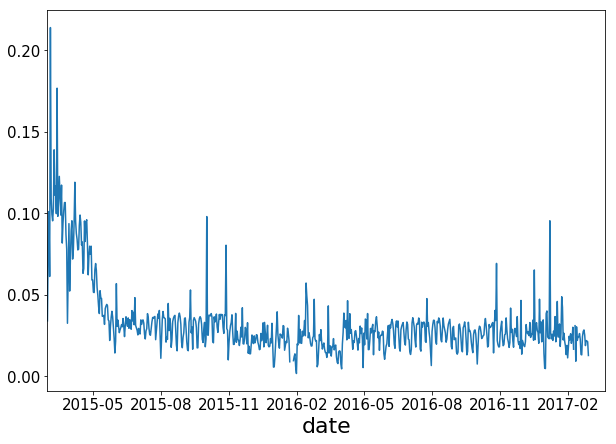

In [5]:
# plot all counts
query_bulk = """
    SELECT * from features;
"""

bulk_df = pd.read_sql_query(query_bulk, con)
grps = bulk_df.groupby('date').sum()[['bikes_out', 'rbikes_out']]

grps['frac'] = grps.rbikes_out / grps.bikes_out
grps['frac'].plot()

It looks like Citibike is having to make fewer rebalancing trips as a fraction of total bike traffic